### Written by Yukun Wan @yw3447
### NYU CUSP PUI
### Assignment 1 Homework 3
### This is a skeleton & instruction notebook
 
### GENERATE  100 samples of different sizes N from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
### Describe the behavior you see in the plots in terms of the law of large numbers.
### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'Yukun Wan'

import pylab as pl
import numpy as np

np.random.seed(10)
    
%pylab inline
pl.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm

## choose which distributions to use 

In [3]:
distributions = ['Chisq','Normal','Poisson','Binomial','Gamma']

md = {}

## set Mean and Size 

In [4]:
mymean = 100

In [5]:
mysize = np.array([np.random.randint(10,500,50),np.random.randint(501,2000,50)]).reshape(100)
print (mysize, mysize.shape)

[ 275  135  494   25  330  379  133  166  483  231  423  379   18   83  266
   50  430  381   26  366  249  405   64  354  373  132   72   43  210  366
  472  187  189   64   87  463   23  253  419  392  151  358  352  296  168
   99  150  331   41  323  784  594  578  907 1420 1107 1261  896 1599 1741
 1918  516 1989 1131 1596 1869 1920 1955 1660 1216 1297 1302 1993 1263  973
  545 1146  505  572 1869 1889 1707  791  861 1284 1986 1357 1156 1522  635
 1771 1098 1247 1163 1125 1281 1233  981  563  686] (100,)


## Now let's do it for 100 Chisq distributions

In [6]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

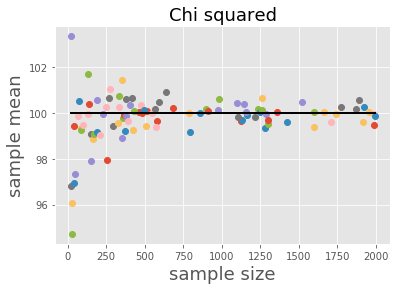

In [7]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['Chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['Chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['Chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(6,4)).add_subplot(111)

for nn in md['Chisq']:
    if not type(nn) == str:
        md['Chisq']['means'][nn] = md['Chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['Chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 1a:  Chi squared - The larger the sample size is, the closer the sample mean is to mymean

# now the histogram of the mean of all Chi squared samples

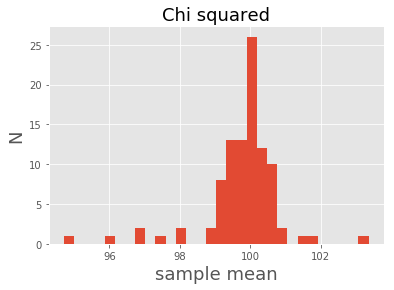

In [8]:
allmeans = list(md['Chisq']['means'].values())

pl.figure(figsize=(6, 4))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chi squared', fontsize = 18)

### Figure 1b: Chi squared - The larger the N is, the closer the sample mean is to 100

# Do it for the Normal distribution


**For Normal distribution, the arguments are mean, standard variance and size.**

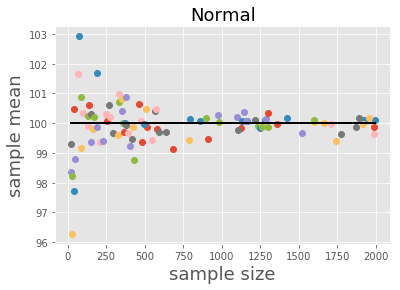

In [9]:
md['Normal'] = {}

mean = mymean
std = 10

for n in mysize:
    md['Normal'][n] = np.random.normal(mean,std,n)
    
# save the means for plotting later    

md['Normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(6,4)).add_subplot(111)

for nn in md['Normal']:
    if not type(nn) == str:
        md['Normal']['means'][nn] = md['Normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['Normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')


### Figure 2a: Normal - The larger the sample size is, the closer the sample mean is to mymean

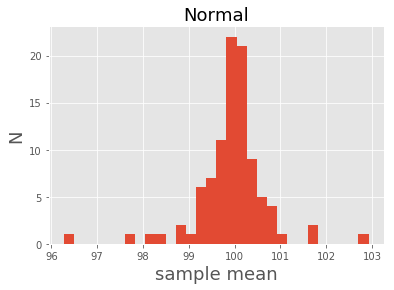

In [10]:
allmeans = list(md['Normal']['means'].values())

pl.figure(figsize=(6,4))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal', fontsize = 18)

### Figure 2b: Normal - The larger the sample size is, the closer the sample mean is to  100

# Do it for the Poisson distribution

**For Poission distribution, the arguments are Lam and Size.**
**Mean of Poission distribution is the same as Lam**

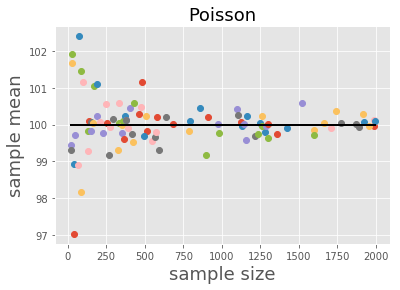

In [11]:
md['Poisson'] = {}

lam = mymean

for n in mysize:
    md['Poisson'][n] = np.random.poisson(lam,n)
    
# save the means for plotting later    

md['Poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(6,4)).add_subplot(111)

for nn in md['Poisson']:
    if not type(nn) == str:
        md['Poisson']['means'][nn] = md['Poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['Poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')


### Figure 3a: Poisson - The larger the sample size is, the closer the sample mean is to mymean

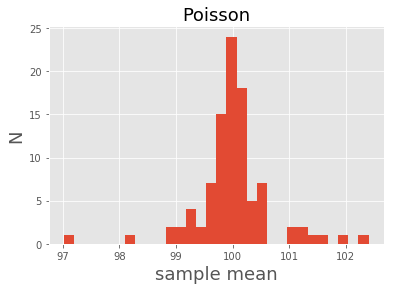

In [12]:
allmeans = list(md['Poisson']['means'].values())

pl.figure(figsize=(6,4))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson', fontsize = 18)

### Figure 3b: Poisson - The larger the sample size is, the closer the sample mean is to mymean

# Do it for the Binomial distribution

**For Binimial distribution, the arguments are n trials, p probability of success and size (where n an integer >= 0 and p is in the interval [0,1])**

**Mean of Binomial distribution is n * p **

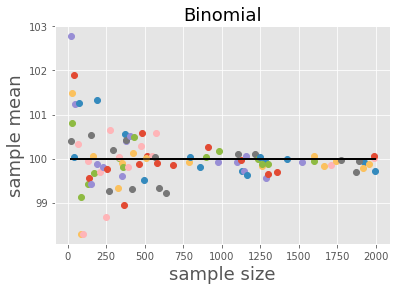

In [13]:
md['Binomial'] = {}

prob = 0.3
ntrials = mymean / prob

for n in mysize:
    md['Binomial'][n] = np.random.binomial(ntrials,prob,n)
    
# save the means for plotting later    

md['Binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(6,4)).add_subplot(111)

for nn in md['Binomial']:
    if not type(nn) == str:
        md['Binomial']['means'][nn] = md['Binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['Binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')


### Figure 4a: Binomial - The larger the sample size is, the closer the sample mean is to mymean

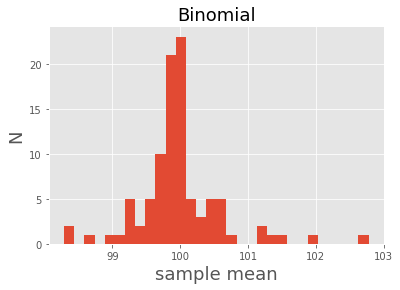

In [14]:
allmeans = list(md['Binomial']['means'].values())

pl.figure(figsize=(6,4))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial', fontsize = 18)

### Figure 4b: Binomial - The larger the sample size is, the closer the sample mean is to mymean

# Do it for Gamma distribution

**For Gamma distribution, the arguments are shape (sometimes designated “k”), scale (sometimes designated “theta”) and size.**

**Mean of Gamma distribution is shape * scale.**

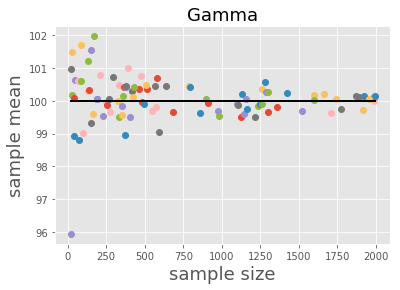

In [15]:
md['Gamma'] = {}

shape = mymean
scale = 1

for n in mysize:
    md['Gamma'][n] = np.random.gamma(shape,scale,n)
    
# save the means for plotting later    

md['Gamma']['means'] = {}
axgamma_mu_n = pl.figure(figsize=(6,4)).add_subplot(111)

for nn in md['Gamma']:
    if not type(nn) == str:
        md['Gamma']['means'][nn] = md['Gamma'][nn].mean()
        #and plot it
        axgamma_mu_n.plot(nn, md['Gamma']['means'][nn], 'o')
        axgamma_mu_n.set_xlabel('sample size', fontsize=18)
        axgamma_mu_n.set_ylabel('sample mean', fontsize=18)
        axgamma_mu_n.set_title('Gamma', fontsize=18)
        axgamma_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')


### Figure 5a: Gamma - The larger the sample size is, the closer the sample mean is to mymean

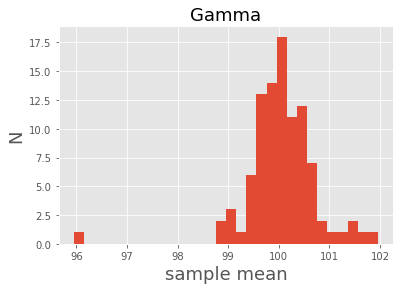

In [16]:
allmeans = list(md['Gamma']['means'].values())

pl.figure(figsize=(6,4))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Gamma', fontsize = 18)

### Figure 5b: Gamma - The larger the sample size is, the closer the sample mean is to mymean

# Extra Credit

### FIT a gaussian to the distribution of means

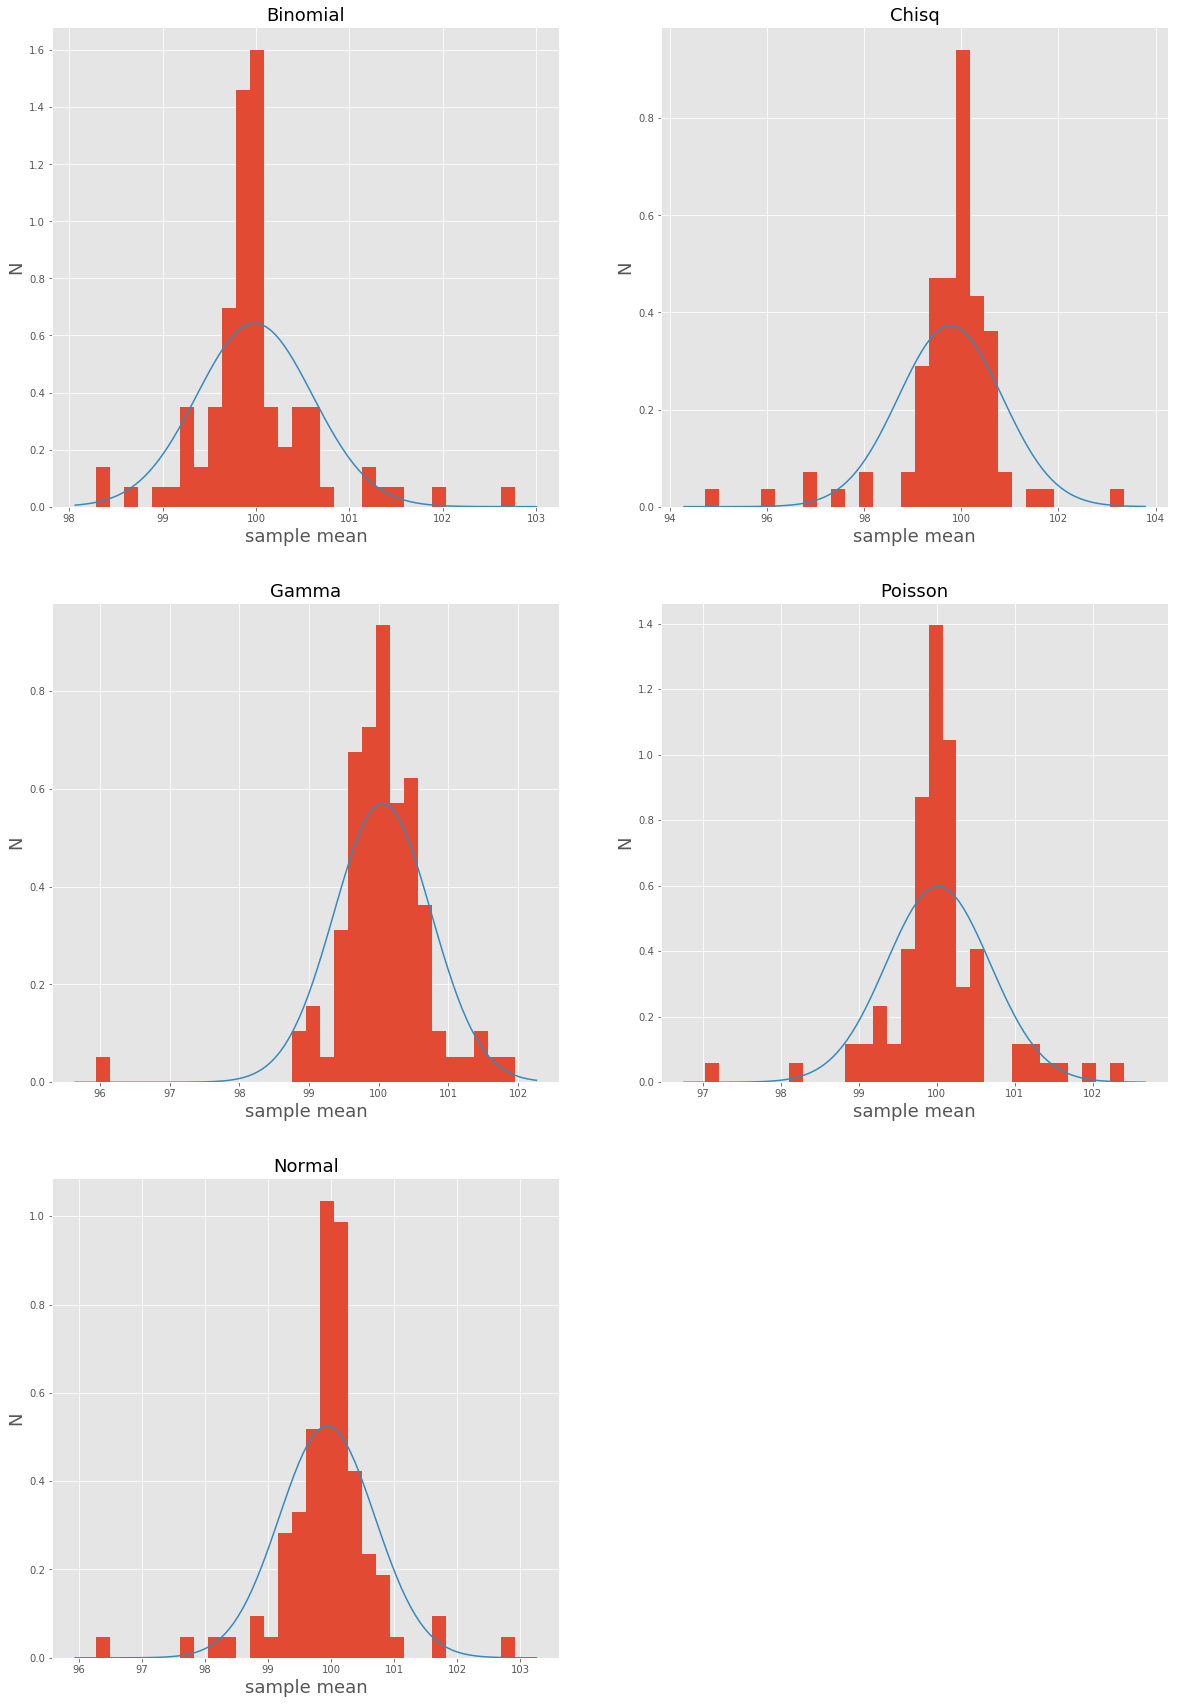

In [17]:
fig = pl.figure(figsize=(20,30))

for i,e in enumerate(md):
    allmeans = list(md[e]['means'].values())

    ax = fig.add_subplot(3,2,i+1)
    
    ax.hist(allmeans,bins=30,normed=True)

    xmin, xmax = pl.xlim()
    x = np.linspace(xmin,xmax,100)
    y = norm.pdf(x,np.mean(allmeans),np.std(allmeans))
    ax.plot(x,y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.set_xlabel('sample mean', fontsize = 18)
    ax.set_ylabel('N', fontsize = 18)
    ax.set_title(e, fontsize = 18)

### Figure 6: FIT a gaussian to Five distributions